# HW3: Classification

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load the modules.


We will work with two datasets
1. Sensors - This dataset classifies if a room is occupied or not based on sensor readings https://archive.ics.uci.edu/dataset/357/occupancy+detection
2. FMNIST - This dataset classifies 10 types of images of clothing https://github.com/zalandoresearch/fashion-mnist

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Question 1 -- Room Occupancy

Suppose you're an engineer working on smart home devices, such as a thermostat that only turns on the heat when a room is occupied.

You need to know when a room is occupied so you devise the following system:
1. Each customer will purchase (from you) four sensors which they place around the room.
2. Each sensor is high quality and measures the ambient temperature, lighting, and sound level of the room with high precision
3. Based on these sensors readings you want to design a model that will predict if the room is occupied or not.

You test out these sensors and gather the following data
1. temp, light, and sound measurements from each sensor
2. whether the room is occupied or not




In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv'
occ = pd.read_csv(url).drop(['Date', 'Time', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'], axis = 1)
occ['occupied'] = 1.0*(occ['Room_Occupancy_Count'] != 0)
occ  = occ.drop(['Room_Occupancy_Count'], axis = 1).astype(int)
occ.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,occupied
0,24,24,24,25,121,34,53,40,0,0,0,0,1
1,24,24,24,25,121,33,53,40,0,0,0,0,1
2,25,24,24,25,121,34,53,40,0,0,0,0,1
3,25,24,24,25,121,34,53,40,0,0,0,0,1
4,25,24,24,25,121,34,54,40,0,0,0,0,1


# part 1.a

First split the data into a feature array `x` and label array `y`
- `x` should contain all sensor readings
- `y` should be only the occupied column

Second split the data into training and testing data with a test size of 33% using random state 42 to get the usual `x_train, x_test, y_train, y_test` datasets

In [ ]:
# make x and y
x = occ.iloc[:, 0:12]
y = occ.iloc[:, 12]
# split intro train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# part 1.b

Train Logistic regression, LDA, and QDA classifiers.

1. Compute the Brier score and Log score for each method on the test dataset
2. Which model has better Brier score? Which has better log score?

In [ ]:
# fit models
lm = LogisticRegression()
lm.fit(x_train, y_train)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)


QuadraticDiscriminantAnalysis()

In [ ]:
# predict probabilities
p_hat_lm = lm.predict_proba(x_test)
p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)

print(p_hat_lm)
print(p_hat_lda)
print(p_hat_qda)

# predict labels
yhat_train_lm = lm.predict(x_train)
yhat_test_lm = lm.predict(x_test)

yhat_train_lda = lda.predict(x_train)
yhat_test_lda = lda.predict(x_test)

yhat_train_qda = qda.predict(x_train)
yhat_test_qda = qda.predict(x_test)

print(yhat_train_lm)
print(yhat_test_lm)
print(yhat_train_lda)
print(yhat_test_lda)
print(yhat_train_qda)
print(yhat_test_qda)


[[9.92323464e-01 7.67653628e-03]
 [1.18913097e-03 9.98810869e-01]
 [9.92323464e-01 7.67653628e-03]
 ...
 [9.92323464e-01 7.67653628e-03]
 [9.99985723e-01 1.42767695e-05]
 [9.99789586e-01 2.10414468e-04]]
[[1.00000000e+00 1.35866148e-12]
 [2.22599716e-12 1.00000000e+00]
 [1.00000000e+00 1.35866148e-12]
 ...
 [1.00000000e+00 1.35866148e-12]
 [1.00000000e+00 2.22663355e-15]
 [1.00000000e+00 2.38408849e-14]]
[[1.00000000e+00 3.36773265e-29]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.36773265e-29]
 ...
 [1.00000000e+00 3.36773265e-29]
 [1.00000000e+00 1.04621309e-31]
 [1.00000000e+00 1.29256031e-31]]
[1 1 0 ... 0 1 0]
[0 1 0 ... 0 0 0]
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]


In [ ]:
print('Brier score')
print('')
print('Logistic Regression: ', brier_score(y_test, p_hat_lm))
print('LDA: ', brier_score(y_test, p_hat_lda))
print('QDA: ', brier_score(y_test, p_hat_qda))

Brier score

Logistic Regression:  0.012043546612982839
LDA:  0.03469936051953028
QDA:  0.033502841754878034


In [ ]:
print('Log score')
print('')
print('Logistic Regression: ', log_score(y_test, p_hat_lm))
print('LDA: ', log_score(y_test, p_hat_lda))
print('QDA: ', log_score(y_test, p_hat_qda))

Log score

Logistic Regression:  0.024176987565747054
LDA:  0.34044456526118677
QDA:  0.7087062459116693


Which model is better? Logistic Regression seems to be the best model because of its lowest Brier and Log score.

# part 1.c

Compute the precision, recall, and F1 score of each method for each target category (1 and 0).

1. Summarize these metrics in tables (one for each model)
2. Which model has the highest average F1 score?

In [ ]:
class_report_lm = metrics.classification_report(y_test, yhat_test_lm)
print('logistic regression:')
print(class_report_lm)

class_report_lda = metrics.classification_report(y_test, yhat_test_lda)
print('lda:')
print(class_report_lda)

class_report_qda = metrics.classification_report(y_test, yhat_test_qda)
print('qda:')
print(class_report_qda)

logistic regression:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2700
           1       0.98      0.99      0.98       643

    accuracy                           0.99      3343
   macro avg       0.99      0.99      0.99      3343
weighted avg       0.99      0.99      0.99      3343

lda:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2700
           1       1.00      0.91      0.95       643

    accuracy                           0.98      3343
   macro avg       0.99      0.96      0.97      3343
weighted avg       0.98      0.98      0.98      3343

qda:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2700
           1       0.99      0.92      0.95       643

    accuracy                           0.98      3343
   macro avg       0.99      0.96      0.97      3343
weighted avg       0.98      0.98      0.98

Which model is better? Overall, the logistic regression model is the best because it has the best precision, recall and f1-scores.

# part 1.d

Now lets look at the tradeoff between sensitivity and specificty. Create a ROC curve for each model and display them in a single plot.

1. Which model has a higher AUC?
2. Are these models close to perfect?

In [ ]:
# compute roc curves for each method. Store fpr, tpr, and thresholds
fpr_lm, tpr_lm, threshholds_lm = roc_curve(y_test, p_hat_lm[:, 1])
fpr_lda, tpr_lda, threshholds_lda = roc_curve(y_test, p_hat_lda[:, 1])
fpr_qda, tpr_qda, threshholds_qda = roc_curve(y_test, p_hat_qda[:, 1])

print('Area under the curve (AUC)')
print('')
print('Logistic Regression has the highest AUC')
print('LR:', np.round(roc_auc_score(y_test, p_hat_lm[:,1]), 5))
print('LDA:', np.round(roc_auc_score(y_test, p_hat_lda[:,1]), 5))
print('QDA:', np.round(roc_auc_score(y_test, p_hat_qda[:,1]), 5))
print('These models are close to perfect since the AUC is close to 1')

Area under the curve (AUC)

Logistic Regression has the highest AUC
LR: 0.9995
LDA: 0.99917
QDA: 0.99741
These models are close to perfect since the AUC is close to 1


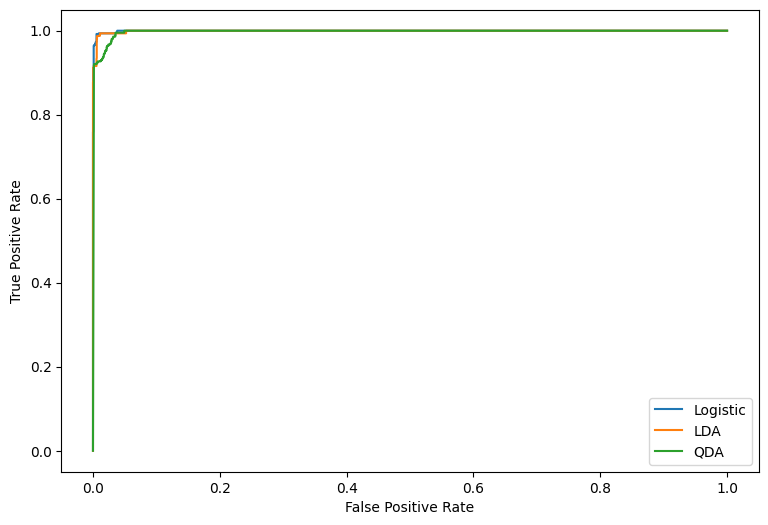

In [ ]:
# plt each roc curve on the same figure
plt.figure(figsize = (9, 6))
plt.plot(fpr_lm, tpr_lm, label = 'Logistic')
plt.plot(fpr_lda, tpr_lda, label = 'LDA')
plt.plot(fpr_qda, tpr_qda, label = 'QDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# part 1.e

Create a calibration curve for each model with at least 20 bins using quantile binning.

1. Plot and label the calibration curves. Include a line to represent perfect calibration.
2. Which model is the most calibrated?


In [ ]:
# compute calibration curves for each model
true_lm, pred_lm = calibration_curve(y_test, p_hat_lm[:,1], n_bins = 20, strategy = 'quantile')
true_lda, pred_lda = calibration_curve(y_test, p_hat_lda[:,1], n_bins = 20, strategy = 'quantile')
true_qda, pred_qda = calibration_curve(y_test, p_hat_qda[:,1], n_bins = 20, strategy = 'quantile')


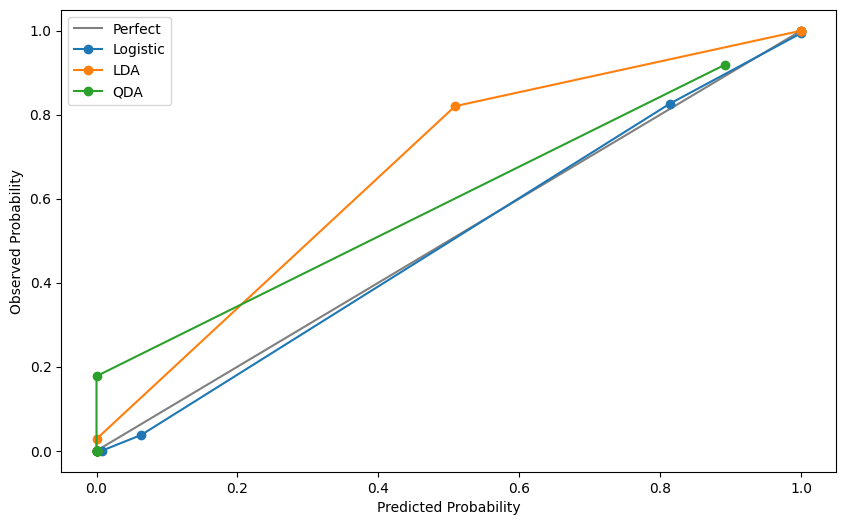

Logistic Regression is the most calibrated


In [ ]:
# plot each calibration curve on the same figure
plt.figure(figsize = (10, 6))
plt.plot([1,0], [1,0], color = 'grey', label = 'Perfect')
plt.plot(pred_lm, true_lm, marker = 'o', label = 'Logistic')
plt.plot(pred_lda, true_lda, marker = 'o', label = 'LDA')
plt.plot(pred_qda, true_qda, marker = 'o', label = 'QDA')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Probability')
plt.legend()
plt.show()
print("Logistic Regression is the most calibrated")

# part 1.f

You find that the system works!


The only thing is these sensors are kind of expensive. Perhaps we can get similar performance with less sensors? That way the whole system will be cheaper and perhaps more people will buy it.

Test each sensor individually (using all three measurements) to see if you can build a classifier that is nearly as good as a classifier that uses all sensors.


1. Refit each model using only the data from a single sensor. For example if you want to use only sensor 1's data then only inlcude `['S1_Temp', 'S1_Light', 'S1_Sound']` as features. Save the Brier and log score for each model and each sensor. Print as a table so that I can tell what the brier and log score are for each model using each sensor.
1. Which sensor is best? Does it depend on the chosen model (Naive Bayes, LDA, QDA, vs Logistic Regression)?
2. How much does using the best sensor increase the Brier / log score and decrease the F1 score compared to using all sensors simultaneously?



In [ ]:
# example using only sensor 1. You need to repeat for each sensor.
x_sensor1 = occ.loc[:, ['S1_Temp', 'S1_Light', 'S1_Sound']]
x_sensor2 = occ.loc[:, ['S2_Temp', 'S2_Light', 'S2_Sound']]
x_sensor3 = occ.loc[:, ['S3_Temp', 'S3_Light', 'S3_Sound']]

y = occ.loc[:,['occupied']]


x_train1, x_test1, y_train1, y_test1 = train_test_split(x_sensor1, y, test_size=0.33, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_sensor2, y, test_size=0.33, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_sensor3, y, test_size=0.33, random_state=42)

In [ ]:
# fit each model and save the brier and log scores
lm1 = LogisticRegression()
lm1.fit(x_train1, y_train1)

lda1 = LDA()
lda1.fit(x_train1, y_train1)

qda1 = QDA()
qda1.fit(x_train1, y_train1)

lm2 = LogisticRegression()
lm2.fit(x_train2, y_train2)

lda2 = LDA()
lda2.fit(x_train2, y_train2)

qda2 = QDA()
qda2.fit(x_train2, y_train2)

lm3 = LogisticRegression()
lm3.fit(x_train3, y_train3)

lda3 = LDA()
lda3.fit(x_train3, y_train3)

qda3 = QDA()
qda3.fit(x_train3, y_train3)


#predict to compute brier and log scores
p_hat_lm1 = lm1.predict_proba(x_test1)
p_hat_lda1 = lda1.predict_proba(x_test1)
p_hat_qda1 = qda1.predict_proba(x_test1)

p_hat_lm2 = lm2.predict_proba(x_test2)
p_hat_lda2 = lda2.predict_proba(x_test2)
p_hat_qda2 = qda2.predict_proba(x_test2)

p_hat_lm3 = lm3.predict_proba(x_test3)
p_hat_lda3 = lda3.predict_proba(x_test3)
p_hat_qda3 = qda3.predict_proba(x_test3)


In [ ]:
# Print out brier and log scores as a table for each model.
# Consider stuffing your results into a pandas dataframe and print that.
# make sure everything is labeled

sensor_Scores = pd.DataFrame({'Brier - Logistic Regression' : [brier_score(y_test1, p_hat_lm1), brier_score(y_test2, p_hat_lm2), brier_score(y_test3, p_hat_lm3)],
                              'Brier - LDA' : [brier_score(y_test1, p_hat_lda1), brier_score(y_test2, p_hat_lda2), brier_score(y_test3, p_hat_lda3)],
                              'Brier - QDA' : [brier_score(y_test1, p_hat_qda1), brier_score(y_test2, p_hat_qda2), brier_score(y_test3, p_hat_qda3)],
                              'Log - Logistic Regression' : [log_score(y_test1, p_hat_lm1), log_score(y_test2, p_hat_lm2), log_score(y_test3, p_hat_lm3)],
                              'Log - LDA' : [log_score(y_test1, p_hat_lda1), log_score(y_test2, p_hat_lda2), log_score(y_test3, p_hat_lda3)],
                              'Log - QDA' : [log_score(y_test1, p_hat_qda1), log_score(y_test2, p_hat_qda2), log_score(y_test3, p_hat_qda3)]}).T
sensor_Scores.columns = ['Sensor 1', 'Sensor 2', 'Sensor 3']
sensor_Scores

,Sensor 1,Sensor 2,Sensor 3
Brier - Logistic Regression,0.033869,0.077323,0.150879
Brier - LDA,0.034698,0.184969,0.172653
Brier - QDA,0.077676,0.085105,0.188662
Log - Logistic Regression,0.080261,0.125676,0.229199
Log - LDA,0.346398,0.362528,0.301865
Log - QDA,0.372975,0.283945,0.462406


In [ ]:
yhat_train_lm1 = lm1.predict(x_train1)
yhat_test_lm1 = lm1.predict(x_test1)

yhat_train_lda1 = lda1.predict(x_train1)
yhat_test_lda1 = lda1.predict(x_test1)

yhat_train_qda1 = qda1.predict(x_train1)
yhat_test_qda1 = qda1.predict(x_test1)

class_report_lm1 = metrics.classification_report(y_test1, yhat_test_lm1)
print('logistic regression:')
print(class_report_lm1)

class_report_lda1 = metrics.classification_report(y_test1, yhat_test_lda1)
print('lda:')
print(class_report_lda1)

class_report_qda1 = metrics.classification_report(y_test1, yhat_test_qda1)
print('qda:')
print(class_report_qda1)

logistic regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2700
           1       1.00      0.91      0.95       643

    accuracy                           0.98      3343
   macro avg       0.99      0.96      0.97      3343
weighted avg       0.98      0.98      0.98      3343

lda:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2700
           1       1.00      0.91      0.95       643

    accuracy                           0.98      3343
   macro avg       0.99      0.96      0.97      3343
weighted avg       0.98      0.98      0.98      3343

qda:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2700
           1       0.89      0.91      0.90       643

    accuracy                           0.96      3343
   macro avg       0.93      0.94      0.94      3343
weighted avg       0.96      0.96      0.96

2. Sensor 1 seems to be the best in terms of Brier and Log scores for each model
3. Using the best sensor (Sensor 1) is only slightly worse than using all sensors for each model. There's an increase of about a couple thousandths. The f1 scores are decreased by about anywhere from .01 - 0.5


# part 1.g

Regardless of your findings above, suppose sensor 1 is the only one available due to supply chain issues.

You wonder if all three measurements are even necessary. Using sensor 1, see if any of the measurements (Temp, Light, or Sound) can be dropped from the model without significantly deteriorating performance. Significant deterioration is defined as an increase in test Brier of 5%.


1. Can you achieve a Brier score (on test), using only 1 or 2 variables,  that is within 5% of the Brier score of the model using all 3?
2. Which variables are they?

In [ ]:
# find the smallest set of features that can be retained. Example using only temperature and sound
x_temp = occ.loc[:, ['S1_Temp']]
x_light = occ.loc[:, ['S1_Light']]
x_sound = occ.loc[:, ['S1_Sound']]
x_temp_sound = occ.loc[:, ['S1_Temp', 'S1_Sound']]
x_temp_light = occ.loc[:, ['S1_Temp', 'S1_Light']]
x_light_sound = occ.loc[:, ['S1_Light', 'S1_Sound']]
x_sensor1 = occ.loc[:, ['S1_Temp', 'S1_Light', 'S1_Sound']]


y = occ.loc[:,['occupied']]
x_temp_train, x_temp_test, y_train1, y_test1 = train_test_split(x_temp, y, test_size=0.33, random_state=42)
x_light_train, x_light_test, y_train2, y_test2 = train_test_split(x_light, y, test_size=0.33, random_state=42)
x_sound_train, x_sound_test, y_train3, y_test3 = train_test_split(x_sound, y, test_size=0.33, random_state=42)
x_temp_sound_train, x_temp_sound_test, y_train4, y_test4 = train_test_split(x_temp_sound, y, test_size=0.33, random_state=42)
x_temp_light_train, x_temp_light_test, y_train5, y_test5 = train_test_split(x_temp_light, y, test_size=0.33, random_state=42)
x_light_sound_train, x_light_sound_test, y_train6, y_test6 = train_test_split(x_light_sound, y, test_size=0.33, random_state=42)
x_sensor1_train, x_sensor1_test, y_train7, y_test7 = train_test_split(x_sensor1, y, test_size=0.33, random_state=42)

In [ ]:
# Fit the models and compute the Brier scores
lm1 = LogisticRegression()
lm1.fit(x_temp_train, y_train1)
lda1 = LDA()
lda1.fit(x_temp_train, y_train1)
qda1 = QDA()
qda1.fit(x_temp_train, y_train1)

lm2 = LogisticRegression()
lm2.fit(x_light_train, y_train2)
lda2 = LDA()
lda2.fit(x_light_train, y_train2)
qda2 = QDA()
qda2.fit(x_light_train, y_train2)

lm3 = LogisticRegression()
lm3.fit(x_sound_train, y_train3)
lda3 = LDA()
lda3.fit(x_sound_train, y_train3)
qda3 = QDA()
qda3.fit(x_sound_train, y_train3)

lm4 = LogisticRegression()
lm4.fit(x_temp_sound_train, y_train4)
lda4 = LDA()
lda4.fit(x_temp_sound_train, y_train4)
qda4 = QDA()
qda4.fit(x_temp_sound_train, y_train4)

lm5 = LogisticRegression()
lm5.fit(x_temp_light_train, y_train5)
lda5 = LDA()
lda5.fit(x_temp_light_train, y_train5)
qda5 = QDA()
qda5.fit(x_temp_light_train, y_train5)

lm6 = LogisticRegression()
lm6.fit(x_light_sound_train, y_train6)
lda6 = LDA()
lda6.fit(x_light_sound_train, y_train6)
qda6 = QDA()
qda6.fit(x_light_sound_train, y_train6)

lm7 = LogisticRegression()
lm7.fit(x_sensor1_train, y_train7)
lda7 = LDA()
lda7.fit(x_sensor1_train, y_train7)
qda7 = QDA()
qda7.fit(x_sensor1_train, y_train7)

#predict to compute brier and log scores
p_hat_lm1 = lm1.predict_proba(x_temp_test)
p_hat_lda1 = lda1.predict_proba(x_temp_test)
p_hat_qda1 = qda1.predict_proba(x_temp_test)

p_hat_lm2 = lm2.predict_proba(x_light_test)
p_hat_lda2 = lda2.predict_proba(x_light_test)
p_hat_qda2 = qda2.predict_proba(x_light_test)

p_hat_lm3 = lm3.predict_proba(x_sound_test)
p_hat_lda3 = lda3.predict_proba(x_sound_test)
p_hat_qda3 = qda3.predict_proba(x_sound_test)

p_hat_lm4 = lm4.predict_proba(x_temp_sound_test)
p_hat_lda4 = lda4.predict_proba(x_temp_sound_test)
p_hat_qda4 = qda4.predict_proba(x_temp_sound_test)

p_hat_lm5 = lm5.predict_proba(x_temp_light_test)
p_hat_lda5 = lda5.predict_proba(x_temp_light_test)
p_hat_qda5 = qda5.predict_proba(x_temp_light_test)

p_hat_lm6 = lm6.predict_proba(x_light_sound_test)
p_hat_lda6 = lda6.predict_proba(x_light_sound_test)
p_hat_qda6 = qda6.predict_proba(x_light_sound_test)

p_hat_lm7 = lm7.predict_proba(x_sensor1_test)
p_hat_lda7 = lda7.predict_proba(x_sensor1_test)
p_hat_qda7 = qda7.predict_proba(x_sensor1_test)



In [ ]:
# Print out brier and log scores as a table for each model.
# Consider stuffing your results into a pandas dataframe and print that.
# make sure everything is labeled

sensor_Scores = pd.DataFrame({'Brier - Logistic Regression' : [brier_score(y_test1, p_hat_lm1), brier_score(y_test2, p_hat_lm2), brier_score(y_test3, p_hat_lm3), brier_score(y_test4, p_hat_lm4), brier_score(y_test5, p_hat_lm5), brier_score(y_test6, p_hat_lm6), brier_score(y_test7,p_hat_lm7)],
                              'Brier - LDA' : [brier_score(y_test1, p_hat_lda1), brier_score(y_test2, p_hat_lda2), brier_score(y_test3, p_hat_lda3), brier_score(y_test4, p_hat_lda4), brier_score(y_test5, p_hat_lda5), brier_score(y_test6,p_hat_lda6), brier_score(y_test7,p_hat_lda7)],
                              'Brier - QDA' : [brier_score(y_test1, p_hat_qda1), brier_score(y_test2, p_hat_qda2), brier_score(y_test3, p_hat_qda3), brier_score(y_test4, p_hat_qda4), brier_score(y_test5, p_hat_qda5), brier_score(y_test6,p_hat_qda6), brier_score(y_test7,p_hat_qda7)]}).T
sensor_Scores.columns = ['Temp', 'Light', 'Sound', 'Temp & Sound', 'Temp & Light', 'Light & Sound', 'All features']
sensor_Scores


,Temp,Light,Sound,Temp & Sound,Temp & Light,Light & Sound,All features
Brier - Logistic Regression,0.193524,0.034118,0.271875,0.172466,0.034097,0.033908,0.033869
Brier - LDA,0.210749,0.034699,0.273625,0.197690,0.034698,0.034699,0.034698
Brier - QDA,0.207132,0.036543,0.309241,0.189975,0.078620,0.034747,0.077676


In [ ]:
print('You can acheive a similar brier score to the full sensor using any of the following feature combinations,  Light, Temp & Light, and Light & Sound')

You can acheive a similar brier score to the full sensor using any of the following feature combinations,  Light, Temp & Light, and Light & Sound


# part 1.h

Now were going even cheaper -- noisy instruments

Your boss says she knows this great factory that produces much cheaper sensors that are "just as good". You go on their website and find that that isnt quite true. It turns out

- They only make sensor 1
- They can't measure sound, but they can measure light and temp.
- They produce noisy readings.


Thankfully you can customize your order by how (cheap) noisy the sensor readings. Sensors that cost more have less noise. Sensors that cost less have more noise.

In the code below the `scale` variable determines how noisy (cheap) your sensor is. (Do not modify the rest of this code).

You want to order as cheaply as possible without compromising on quality, so you want to figure out how high you can set the `scale` value.

1. Increase the `scale` parameter until your test Brier score is just under 0.05 and precision of the positive class is still at least 0.98.
2. What is the highest `scale` value to the nearest 0.1 that achieves this?


In [ ]:
# Use temp and light since they're available
x = np.array(occ.loc[:, ['S1_Temp', 'S1_Light']])

### noisy instruments (reduces signal strength by 4 and adds white noise)
np.random.seed(0)
scale = 6.4
x = x / 4 + np.random.normal(scale = scale, size = x.shape)

# occ['occupied'] = occ['Room_Occupancy_Count']
y = occ.loc[:,['occupied']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# fit the models
lm = LogisticRegression()
lm.fit(x_train, y_train)

lda = LDA()
lda.fit(x_train, y_train)

qda = QDA()
qda.fit(x_train, y_train)
# Compute Brier scores
p_hat_lm = lm.predict_proba(x_test)
p_hat_lda = lda.predict_proba(x_test)
p_hat_qda = qda.predict_proba(x_test)
# Compute precision
yhat_lm = lm.predict(x_test)
yhat_lda = lda.predict(x_test)
yhat_qda = qda.predict(x_test)
#print brier and precision
print('Brier score')
print('')
print('Logistic Regression: ', brier_score(y_test, p_hat_lm))
print('LDA: ', brier_score(y_test, p_hat_lda))
print('QDA: ', brier_score(y_test, p_hat_qda))
print('')
print('Precision')
print('')
print('Logistic Regression: ', metrics.precision_score(y_test, yhat_lm))
print('LDA: ', metrics.precision_score(y_test, yhat_lda))
print('QDA: ', metrics.precision_score(y_test, yhat_qda))


Brier score

Logistic Regression:  0.04644290597700573
LDA:  0.0423426679659484
QDA:  0.047443365564643146

Precision

Logistic Regression:  0.9813874788494078
LDA:  0.9846938775510204
QDA:  0.954248366013072


# **The highest scale value that meets the requirements is 6.4**

# Question 2. Classifying images

Now we work for a clothing company and we want to identify images of different kinds of shoes. Specifically, given an image of either "Sandals", "Sneakers", and "Ankle Boots" we want to label the image correctly.

We go down to the IT department and ask the IT guy for some data. He grumbles and briefly pauses _Hunter x Hunter_ to send us "some data". It turns out he sent us a lot more than we asked for. We receive a dataset of 60000 images containing "Sandals", "Sneakers", and "Ankle Boots" but also 7 other kinds of images.

Use the following code to download the data. If you are on google colab you will not need to install any new packages and you can just run the code. If you are not on google colab then install the following packages with

`pip3 install torch torchvision torchaudio`

and then run the code.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from tqdm.notebook import tqdm
from tqdm.notebook import trange

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 9.69MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 63.1MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.5MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# part 2.a

After brief inspection we find that the Fashion MNIST dataset contains 9 classes

Label Map

0 : "T-Shirt"

1: "Trouser"

2: "Pullover"

3: "Dress"

4: "Coat"

5: "Sandal"

6: "Shirt"

7: "Sneaker"

8: "Bag"

9: "Ankle Boot"


First we need to extract out only the relevant items from the dataset. Namely those observations that correspond to "Sandals", "Sneakers", and "Ankle Boots" or observations where the label is 5, 7, or 9

You can extract the image and label from the training_data object with `training_data[idx]` which will extract the image and label from the training dataset that corresponds to observation `idx`.

See the example below that extracts observation 0

In [ ]:
idx = 0
img, label = training_data[idx]

1. Write a loop (or however you want) to pull out all observations with a 5, 7, or 9 label. Store the extracted image in `shoes` and the extracted labels in `labels`. There are 6000 images per class in this dataset.

In [ ]:
shoes = np.zeros((3 * 6000, 28*28))
labels = np.zeros(3 * 6000)

currentIndex = 0
for i in trange(len(training_data)):
  img, label = training_data[i]
  img = img.flatten() # flattens the image into a vector

  # store these only if label in [5, 7, 9]
  if label in [5,7,9]:
    shoes[currentIndex] = img
    labels[currentIndex] = label
    currentIndex += 1

  0%|          | 0/60000 [00:00<?, ?it/s]

2. Plot one observation from each class. Label the image with the name of the class. Note that the stored shoe images, e.x. `shoe[0]` is a vector and needs to be reshaped into a 28 x 28 pixel image. Use `imshow`

Text(0.5, 1.0, 'Sandals')

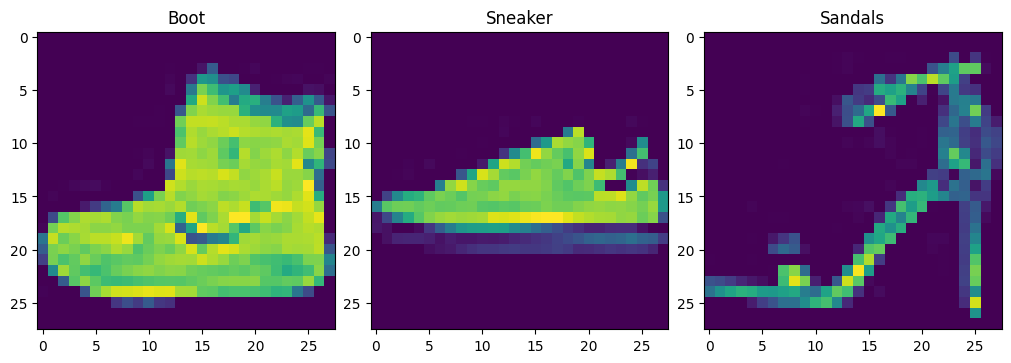

In [ ]:
fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 4))
ax[0].imshow(shoes[0].reshape(28,28))
ax[0].set_title('Boot')
ax[1].imshow(shoes[1].reshape(28,28))
ax[1].set_title('Sneaker')
ax[2].imshow(shoes[2].reshape(28,28))
ax[2].set_title('Sandals')
### print one image per ax. Example provided. Dont forget to reshape!

In [ ]:
### Example plot. Do not run.

# part 2.b

Your boss doesnt want to pay for the computing necessary for deep learning so were going to fit some classical models and hope for the best.

1. Split the data with a test_size = 0.33 and random_state 42 using the `train_test_split()` function.

2. Fit LDA, QDA, and Logistic Regression to the training data.

In [ ]:
x = shoes
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# fit models
lda = LDA()
qda = QDA()
lm = LogisticRegression()

lda.fit(x_train, y_train)
qda.fit(x_train, y_train)
lm.fit(x_train, y_train)

p_hat_train_lda = lda.predict_proba(x_train)
p_hat_test_lda = lda.predict_proba(x_test)

p_hat_train_qda = qda.predict_proba(x_train)
p_hat_test_qda = qda.predict_proba(x_test)

p_hat_train_lm = lm.predict_proba(x_train)
p_hat_test_lm = lm.predict_proba(x_test)

3. Print the training error and test error (Brier and Log).
4. Which model has the lowest train? Lowest test? Lowest difference between train and test?

In [ ]:
# predict probabilities
yhat_train_lda = lda.predict(x_train)
yhat_test_lda = lda.predict(x_test)

yhat_train_qda = qda.predict(x_train)
yhat_test_qda = qda.predict(x_test)

yhat_train_lm = lm.predict(x_train)
yhat_test_lm = lm.predict(x_test)



In [ ]:
print('Test')
print('Brier score')
print('')

print('LDA: ',brier_score(y_test, p_hat_test_lda))
print('QDA: ',brier_score(y_test, p_hat_test_qda))
print('Logistic Regression: ',brier_score(y_test, p_hat_test_lm))


print('')
print('Log score')
print('')

print('LDA: ', log_score(y_test, p_hat_test_lda))
print('QDA: ', log_score(y_test, p_hat_test_qda))
print('Logistic Regression: ', log_score(y_test, p_hat_test_lm))

print('')
print('-----------------------')
print('')

print('Train')
print('Brier score')
print('')

print('LDA: ',brier_score(y_train, p_hat_train_lda))
print('QDA: ',brier_score(y_train, p_hat_train_qda))
print('Logistic Regression: ',brier_score(y_train, p_hat_train_lm))


print('')
print('Log score')
print('')

print('LDA: ', log_score(y_train, p_hat_train_lda))
print('QDA: ', log_score(y_train, p_hat_train_qda))
print('Logistic Regression: ', log_score(y_train, p_hat_train_lm))

print('')
print('The lowest train is Logistic Regression')
print('The lowest test is QDA')
print('The lowest difference is Logistic Regression')

Test
Brier score

LDA:  0.11511026404554336
QDA:  0.7333705938467165
Logistic Regression:  0.08973432094550028

Log score

LDA:  0.4135432256417132
QDA:  26.805014440110153
Logistic Regression:  0.1681151412457632

-----------------------

Train
Brier score

LDA:  0.0923255944228321
QDA:  0.6915100414073894
Logistic Regression:  0.06169187980863227

Log score

LDA:  0.20481808422752834
QDA:  25.28015289151258
Logistic Regression:  0.11453645466189817

The lowest train is Logistic Regression
The lowest test is QDA
The lowest difference is Logistic Regression


# part 2.c

1. Print the classification report for each method.
2. Which method is best in terms of F1 score?

In [ ]:
# predict labels for each model
y_pred_lda = lda.predict(x_test)
y_pred_qda = qda.predict(x_test)
y_pred_lm = lm.predict(x_test)

In [ ]:
# print classification report. Which is best in terms of F1?
print("LDA Classification Report:")
print(metrics.classification_report(y_test, y_pred_lda))

print("QDA Classification Report:")
print(metrics.classification_report(y_test, y_pred_qda))

print("Logistic Regression Classification Report:")
print(metrics.classification_report(y_test, y_pred_lm))

print('The best model in terms of f1 score is Logistic Regression')

LDA Classification Report:
              precision    recall  f1-score   support

         5.0       0.94      0.93      0.94      1944
         7.0       0.90      0.93      0.91      1980
         9.0       0.95      0.93      0.94      2016

    accuracy                           0.93      5940
   macro avg       0.93      0.93      0.93      5940
weighted avg       0.93      0.93      0.93      5940

QDA Classification Report:
              precision    recall  f1-score   support

         5.0       0.85      0.16      0.27      1944
         7.0       0.54      0.97      0.69      1980
         9.0       0.76      0.76      0.76      2016

    accuracy                           0.63      5940
   macro avg       0.72      0.63      0.57      5940
weighted avg       0.72      0.63      0.58      5940

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         5.0       0.95      0.94      0.95      1944
         7.0       0.93      0.9

# part 2.d

Compute and print the accuracy of each method. Which method has the highest accuracy?

In [ ]:
print('Accuracy')
print('')
print('LDA: ', metrics.accuracy_score(y_test, y_pred_lda))
print('QDA: ', metrics.accuracy_score(y_test, y_pred_qda))
print('Logistic Regression: ', metrics.accuracy_score(y_test, y_pred_lm))

print('')
print('The highest accuracy is Logistic Regression')

Accuracy

LDA:  0.92996632996633
QDA:  0.6333333333333333
Logistic Regression:  0.9420875420875421

The highest accuracy is Logistic Regression


# part 2.e

The above results are dependent on the the specific seed we set in the train test split function.

How do we know the best model would still be the best if the data was split differently? Let's resplit the data a few times and determine which model is best on average.

1. Refit your models using 20 different seed values in the `train_test_split` function. Use seed values 0 to 19.
2. Recompute the test set brier score and accuracy for each seed.
3. Print out the average Brier score and accuracy and the standard deviation of each metric.
4. Is the best model always better than the others? Which model is best on average?


In [ ]:
seeds = np.arange(20)
results = []
for seed in seeds:
    # Split the data with the current seed
    x_train, x_test, y_train, y_test = train_test_split(
        shoes, labels, test_size=0.33, random_state=seed
    )

    lda = LDA()
    qda = QDA()
    lm = LogisticRegression()

    lda.fit(x_train, y_train)
    qda.fit(x_train, y_train)
    lm.fit(x_train, y_train)

    # Predict probabilities and labels
    p_hat_lda = lda.predict_proba(x_test)
    p_hat_qda = qda.predict_proba(x_test)
    p_hat_lm = lm.predict_proba(x_test)

    y_pred_lda = lda.predict(x_test)
    y_pred_qda = qda.predict(x_test)
    y_pred_lm = lm.predict(x_test)

    # Calculate Brier score and accuracy
    brier_lda = brier_score(y_test, p_hat_lda)
    brier_qda = brier_score(y_test, p_hat_qda)
    brier_lm = brier_score(y_test, p_hat_lm)

    acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
    acc_qda = metrics.accuracy_score(y_test, y_pred_qda)
    acc_lm = metrics.accuracy_score(y_test, y_pred_lm)

    # Store the results
    results.append(
        [
            seed,
            brier_lda,
            brier_qda,
            brier_lm,
            acc_lda,
            acc_qda,
            acc_lm,
        ]
    )

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(
    results,
    columns=[
        "Seed",
        "Brier_LDA",
        "Brier_QDA",
        "Brier_LM",
        "Accuracy_LDA",
        "Accuracy_QDA",
        "Accuracy_LM",
    ],
)

# Calculate and print average and standard deviation
print("Average Brier Score:")
print(results_df[["Brier_LDA", "Brier_QDA", "Brier_LM"]].mean())
print("\nStandard Deviation of Brier Score:")
print(results_df[["Brier_LDA", "Brier_QDA", "Brier_LM"]].std())

print("\nAverage Accuracy:")
print(results_df[["Accuracy_LDA", "Accuracy_QDA", "Accuracy_LM"]].mean())
print("\nStandard Deviation of Accuracy:")
print(results_df[["Accuracy_LDA", "Accuracy_QDA", "Accuracy_LM"]].std())

Average Brier Score:
Brier_LDA    0.120270
Brier_QDA    0.747373
Brier_LM     0.094069
dtype: float64

Standard Deviation of Brier Score:
Brier_LDA    0.005473
Brier_QDA    0.024789
Brier_LM     0.003773
dtype: float64

Average Accuracy:
Accuracy_LDA    0.927189
Accuracy_QDA    0.626212
Accuracy_LM     0.938232
dtype: float64

Standard Deviation of Accuracy:
Accuracy_LDA    0.003144
Accuracy_QDA    0.012355
Accuracy_LM     0.002861
dtype: float64


The best model on average is Logistic classification. It is not always the best model because you can acheive better metrics with LDA in cases where the LDA is 2 standard deviations above it's average and Logistic classification is 2 standard deviations below its average, LDA is the better model.

# part 2.f

Based on everything you have seen in parts a-e. Which model would you choose and why? Explain using at least 3 sentences and using the metrics you saw above.

Enter thoughts here.

In [ ]:
print(' We would choose Logistic Regression because on average across different splits it has the highest accuracy and lowest brier score. Furthermore it has the highest f1 scores accross different labels. These metrics that logistic is the most generalizable. The metrics indicate that LDA is also generalizable accross classes but in total not as accurate as Logistic Classification most of the time')

 We would choose Logistic Regression because on average across different splits it has the highest accuracy and lowest brier score. Furthermore it has the highest f1 scores accross different labels. These metrics that logistic is the most generalizable. The metrics indicate that LDA is also generalizable accross classes but in total not as accurate as Logistic Classification most of the time
